# Data Mining and Visualization of the South Park (SP) Wiki Archives

This notebook documents the final project assignment of the course 02805, social graphs and interactions. This ntoebook is accompanied by a Web site. The Web site serves as a more superficial overview of this project, whereas this notebook goes into the nitty gritty details of how all the results were achieved and calculated. 

We chose South Park for our project because of the rich data sets that are available online. Specifically, we were limited to using a Wiki as our main source and the South Park Archives Wiki (https://southpark.fandom.com/wiki/South_Park_Archives) has an amazing amount of data on almost two thousand characters from over 20 seasons. As we were encouraged to choose datasets, which would allow for large networks with many nodes, we thought that an innocent children’s show with such a deep data pool is the obvious choice! 

Our analysis focused on the entire network, however, we have also looked deeper into some of the main and major characters. We started out by building a large dataframe with all the characters, their genders, roles, and other attributes. Notebook A is where all of the data mining details are. Where as teh data analysis can be found in ntoebook B. This includes various networks, with different algorithms. These networks are built and visualised as beautifully as possible for three engineering students. Lastly, the sentiment, and communities are analysed, and some South Park word clouds are drawn. 


### **Purpose:**
Ths part mostly handles data mining and curating for the purpose of:
- API handling of the wiki pages
- creating a DataFrame object containing SouthPark (SP) characters and their attributes
- data visualization done on the DataFrame object
- creating the SP graphs
- downloading TXT files from the  JSON contents
- compiling clean word tokens of the TXT files

### **WorkFlow:**
1) APIs of the Wiki Pages were handled in order to retrieve the relevant JSON contents containing the relevant information of the wiki pages. Information regarding the SP characters and their role using RegEx patterns. And initial DataFrame object was formed.

4) Using the retrieved JSON contents, TXT files containing the relevant information for each South Park character was downloaded and stored in the folder: Characters_txt_files. Those files were used to extract the gender, race, and epoisode appearance attributes. 

2) The SP characters as well as the retrieved attributes were added in a DataFrame object 'df_final', which was processed and stored for later usage as a CSV file: df_final_SouthPark_characters.csv. The attributes of df_final, which were categorical variables, were visualized using bar charts in order to asses the predominant attributes. 

3) Using the data from the DataFrame object, 2 graph were created (see subsection: Graphs) and exported as: graph.gexf and graph_game.gexf. Visualization of those graphs can be found in Part B. 

5) The TXT files from the Characters_txt_files folder were processed (clean word tokens were extracted) and saved under the folder: Characters_clean_tokens. The clear token files were used for further text analysis in Part B. 
##### **Main Wiki Fandoms:**

South Park Archives: https://southpark.fandom.com/wiki/South_Park_Archives 

South Park Archives: Wiki page for each SP character

South Park Archives: Stick of Truth: https://southpark.fandom.com/wiki/South_Park:_The_Stick_of_Truth 

#### **API handling**

Was done using these Wiki fandoms, as well as the Wiki page archive of each South Park character. 


#### **TXT files**

The TXT for each character were downloaded using the API content. A TXT file contains the main text content of the Wiki page for each South Park character 


#### **DataFrame object: df_final**

A DataFram object 'df_final' was be compiled, containing:
- Name: API  name of each South Park character (handling special characters)
- Real_Name: real name of each South Park character (as it appears on the Wiki page)
- Role: role in the 'Stick of Truth' Game: Playable Characters, Enemies, Land of Zaron, Merchants or Not in the Game
- Attr: characters' role in the series (main character, major-supportive character, other (if not specified))
- Gender: Male, Female or Unknown
- Race: race of each South Park character
- Appearance: Episode appearance

#### **Graphs**
##### **South Park Graph for the whole Series**

**Nodes**: characters from the whole South Park Series
**Node Attributes**:
 - real name: character name as it appears on the Wiki page
 - game role: Playable Characters, Enemies, Land of Zaron, Merchants or Not in the Game
 - series role: characters' role in the series (main character, major-supportive character, other (if not specified))
 - gender: Male, Female or Unknown
 - race
 - episode appearance

**Edges**: each character will be linked to the other characters based on their interractions given by the Wiki pages

##### **South Park Graph for the whole Game**

**Nodes**: SP characters apparing in the Stick of Truth Game
**Node Attributes**:
 - real name: character name as it appears on the Wiki page
 - game role: Playable Characters, Enemies, Land of Zaron, Merchants or Not in the Game
 - series role: characters' role in the series (main character, major-supportive character, other (if not specified))
 - gender
 - race

**Edges**: each character will be linked to the other characters based on their interractions given by the Wiki pages


#### **Clean Token files**

Based on the TXT files, clean word tokens were compiled and saved for each South Park character.


# Package pre-requisites

In [ ]:
# Pre-requisites to run this notebook: install the packages
'''
!pip install numpy
!pip install pandas
!pip install networkx
!pip install fa2
!pip install plotly==5.4.0
!pip install python-louvain
!pip install nltk
!pip install urlib
'''

'\n!pip install numpy\n!pip install pandas\n!pip install networkx\n!pip install fa2\n!pip install plotly==5.4.0\n!pip install python-louvain\n!pip install nltk\n!pip install urlib\n'

In [ ]:
# Test for package requirements
import numpy as np
import networkx as nx
import plotly
import community.community_louvain
import nltk
import fa2
import pandas
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
# setting up a random seed
import random
random.seed(10)
import random
import numpy as np
seed = 123
random.seed(seed)
np.random.seed(seed)

# API Handling


### List of characters from the whole South Park Series
- Compile a list of characters from the API retrieved from the link: https://southpark.fandom.com/wiki/Portal:Characters

The following block of code queries the South Park Wiki in order to retrieve all of the characters as a list. 

In [ ]:
# Series
import urllib.request
import json
import re
import pandas as pd

# retrieve the API
baseURL = "https://southpark.fandom.com/api.php?"
titles = "titles=Portal:Characters"
action = action = "action=query"
dataformat = "format=json"
content = "prop=revisions&rvprop=content&rvslots=*"

query = "{}{}&{}&{}&{}".format(baseURL, action, content, titles, dataformat)

response = urllib.request.urlopen(query)

#The data is read and processed.
data = response.read()
text_ch = data.decode("utf-8")
tojson = json.loads(text_ch)
#All links are found in square brackets.
#The following regex pattern retrieves the names. 
pattern = r"\[\[([^:]*?)\]\]"
tojson = re.findall(pattern, str(tojson))

list_of_characters = []

#The extracted character names are appended to a list, and if the "|"
#character exists, only the everything before it is appended. 
for i in tojson:
    if i.find("|") != 1:
        list_of_characters.append(i.split("|")[0])
    else:
        list_of_characters.append(i)

# compile the list of characters
#Only the unique values are kept, all duplicates are removed. 
unique_character_list_series = list(set(list_of_characters))

character_list_for_query_series = []
#The character names are tidied up by replacing various characters. 
for i in unique_character_list_series:
    name = i.replace("\\", "")
    name = i.replace(" ", "_")
    character_list_for_query_series.append(name)


### List of Game characters from 'South Park: Stick of Truth'
- Compile a list of characters from the API retrieved from the link: https://southpark.fandom.com/wiki/South_Park:_The_Stick_of_Truth/Characters


In [ ]:
import urllib.request
import json
import re
import pandas as pd

# retrieve the API
baseURL = "https://southpark.fandom.com/api.php?"
titles = "titles=South_Park:_The_Stick_of_Truth/Characters"
action = action = "action=query"
dataformat = "format=json"
content = "prop=revisions&rvprop=content&rvslots=*"

query = "{}{}&{}&{}&{}".format(baseURL, action, content, titles, dataformat)

response = urllib.request.urlopen(query)
data = response.read()
text_ch = data.decode("utf-8")
tojson = json.loads(text_ch)
pattern = r"\[\[([^:]*?)\]\]"
tojson = re.findall(pattern, str(tojson))

list_of_characters = []

# form the list of characters
for i in tojson:
    if i.find("|") != 1:
        list_of_characters.append(i.split("|")[0])
    else:
        list_of_characters.append(i)

unique_character_list = list(set(list_of_characters))

character_list_for_query_game = []
for i in unique_character_list:
    name = i.replace("\\", "")
    name = i.replace(" ", "_")
    character_list_for_query_game.append(name)

#print(len(character_list_for_query_game))

In [ ]:
# get characters by their attributes
# compile a list of role attributes based on the characters in the game
import itertools
characters_txt =json.loads(text_ch) 
#print(characters_txt)
patterns = [r'\\n\\n==Playable Characters.*?\\n\\n', r'\\n\\n==Summons.*?\\n\\n', 
            r'\\n\\n==The Land of Zaron.*(?=Enemies)', r'\\n\\n==Enemies.*(?=Merchants)',
            r'\\n\\n==Merchants.*?\\n\\n', r'\\n\\n==Other characters.*(?=Crab)']
attributes = []

for i in patterns:
    pattern2 = r"\[\[([^:]*?)\]\]"
    ch = re.findall(i, str(characters_txt))
    playable_ch = re.findall(pattern2, str(ch))

    playable_characters = []

    for i in playable_ch:
        if i.find("|") != 1:
            playable_characters.append(i.split("|")[0])
        else:
            playable_characters.append(i)

    #print(playable_characters)

    unique_playable_characters = list(set(playable_characters))

    playable_character_uniq = []

    for i in unique_playable_characters:
        name = i.replace("\\", "")
        name = i.replace(" ", "_")
        playable_character_uniq.append(name)
        attributes.append(playable_character_uniq)


attributes = [list(tupl) for tupl in {tuple(item) for item in attributes }]
attributes.sort(key=len, reverse =True)
#print(attributes)

## Initializing a DataFrame object:
- containing the South Park series characters and their role in the 'Stick of Truth' game

In [ ]:
# creating the DataFrame object with the list of characters and game role (for now)
df = pd.DataFrame(attributes[0])
df.columns = ["Name"]
df['Role'] = "Other characters"

df1 = pd.DataFrame(attributes[1])
df1.columns = ["Name"]
df1['Role'] = "Land of Zaron"

df2 = pd.DataFrame(attributes[2])
df2.columns = ["Name"]
df2['Role'] = "Enemies"

df3 = pd.DataFrame(attributes[3])
df3.columns = ["Name"]
df3['Role'] = "Merchants"

df4 = pd.DataFrame(attributes[4])
df4.columns = ["Name"]
df4['Role'] = "Playable Characters"

df5 = pd.DataFrame(attributes[5])
df5.columns = ["Name"]
df5['Role'] = "Summons"

df6 = pd.DataFrame(character_list_for_query_series)
df6.columns = ["Name"]
df6['Role'] = "Not in the game"

df_final = pd.concat([df,df1,df2,df3,df4,df5, df6],ignore_index=True)

df_final['Real_Name'] = [s.replace('_',' ') for s in df_final['Name']]

df_final = df_final.drop_duplicates(subset=['Name'], keep='first')

#### Find the role cathegory for each character in the whole South Park series

In [ ]:
import urllib.request
import json
import re
import pandas as pd

#API queries are sent exactly like in the previous blocks. 
baseURL = "https://southpark.fandom.com/api.php?"
titles = "titles=Portal:Characters/Categorized_Characters"
action = action = "action=query"
dataformat = "format=json"
content = "prop=revisions&rvprop=content&rvslots=*"

query = "{}{}&{}&{}&{}".format(baseURL, action, content, titles, dataformat)

response = urllib.request.urlopen(query)
data = response.read()
text_ch = data.decode("utf-8")
tojson = json.loads(text_ch)

#We search for 3 different patterns. These patterns find all characters 
#from the page above. 
#This is done for a few reasons, one of which is the flagpole problem with 
#the tags. 
pattern = r"\\n===(.*?)\\n\\n==="
pattern2 = r"\\n\\n===(.*?)\\n==="
tojson_odd = re.findall(pattern, str(tojson)) #first = Groups and cliquies. last = Zeus
tojson_even = re.findall(pattern2, str(tojson)) #first = kindergartners. last = Will Barton
pattern3 = r"\\n\\n===Television\\u200e Celebrities===\\n(.*?)\\n\\n\{"
tojson_3 = re.findall(pattern3, str(tojson)) #first = kindergartners. last = Will Barton

#The same pattern as before can be used to retrieve the names. 
pattern_name = r"\[\[(.*?)\]\]"
tojson_3_names = re.findall(pattern_name, str(tojson_3))

Because of how the Wiki is structured, and to deal with issues like the flagpole problem, it is necessary to go through all the odd instances of characters, all the even, and the last instance because they do not get picked up by the odd and even patterns and need the pattern called 3. 

Note that, the strings "attr:+" and "+§+" are used to easier split them appart later. 

The code below goes through the 3 scenarios, edits the characters so the names match the ones in the dataframe. 

In [ ]:
list_of_characters = []

pattern_temp = r"(.*)===\\n"
for i in range(len(tojson_odd)):
    category = (re.findall(pattern_temp, str(tojson_odd[i])))
    char_in_category = (re.findall(pattern_name, str(tojson_odd[i])))

    list_of_characters.append(category + char_in_category)

final_list_of_characters = []
for i in range(len(list_of_characters)):
    for j in list_of_characters[i]:
        category = list_of_characters[i][0]
        if j.find("|") != 1:
            final_list_of_characters.append("attr:+" + category + "+§+" "char:!" + j.split("|")[0])
        else:
            final_list_of_characters.append("attr:+" + category + "+§+" "char:!" + j)

ultimately_final_list_of_characters_and_attributes = []
for i in range(len(final_list_of_characters)):
    name = final_list_of_characters[i].replace("\\", "")
    name = final_list_of_characters[i].replace(" ", "_")

    ultimately_final_list_of_characters_and_attributes.append(name)

char_with_index = []
cat_with_index = []

for i in range(len(ultimately_final_list_of_characters_and_attributes)):
    character = ultimately_final_list_of_characters_and_attributes[i][ultimately_final_list_of_characters_and_attributes[i].find("!")+1:]
    category = ultimately_final_list_of_characters_and_attributes[i][6:ultimately_final_list_of_characters_and_attributes[i].find("+§+")]
    category = category.replace("_", " ")

    cat_with_index.append(category)
    char_with_index.append(character)

In [ ]:
list_of_characters = []

pattern_temp = r"(.*)===\\n"
for i in range(len(tojson_even)):
    category = (re.findall(pattern_temp, str(tojson_even[i])))
    char_in_category = (re.findall(pattern_name, str(tojson_even[i])))

    list_of_characters.append(category + char_in_category)

final_list_of_characters = []
for i in range(len(list_of_characters)):
    for j in list_of_characters[i]:
            category = list_of_characters[i][0]
            if j.find("|") != 1:
                final_list_of_characters.append("attr:+" + category + "+§+" "char:!" + j.split("|")[0])
            else:
                final_list_of_characters.append("attr:+" + category + "+§+" "char:!" + j)

ultimately_final_list_of_characters_and_attributes = []
for i in range(len(final_list_of_characters)):
    name = final_list_of_characters[i].replace("\\", "")
    name = final_list_of_characters[i].replace(" ", "_")

    ultimately_final_list_of_characters_and_attributes.append(name)

for i in range(len(ultimately_final_list_of_characters_and_attributes)):
    character = ultimately_final_list_of_characters_and_attributes[i][ultimately_final_list_of_characters_and_attributes[i].find("!")+1:]
    category = ultimately_final_list_of_characters_and_attributes[i][6:ultimately_final_list_of_characters_and_attributes[i].find("+§+")]
    category = category.replace("_", " ")

    cat_with_index.append(category)
    char_with_index.append(character)

Sports Celebrities Vince_McMahon
Sports Celebrities Will_Barton
944


In [ ]:
#The category is added manually. 
tojson_3_names.insert(0, "Television‎ Celebrities")

In [ ]:
for i in range(len(tojson_3_names)):
    tojson_3_names[i] = tojson_3_names[i].replace("\\", "")
    tojson_3_names[i] = tojson_3_names[i].replace(" ", "_")

In [ ]:
category = tojson_3_names[0]

new_list = []
for i in range(1, len(tojson_3_names)):
    new_list.append("attr:+" + category + "+§+" "char:!" + tojson_3_names[i])

All the characters are iterated over and a new list is created with a matching index for the character and their attribute. This is done so that the attributes can be inserted into the dataframe with all the information. 

In [ ]:
for i in range(len(new_list)):
    character = new_list[i][new_list[i].find("!")+1:]
    category = new_list[i][6:new_list[i].find("+§+")]
    category = category.replace("_", " ")

    cat_with_index.append(category)
    char_with_index.append(character)

#print(cat_with_index[-2] + " " + char_with_index[-2])
#print(cat_with_index[-1] + " " + char_with_index[-1])
#print(len(char_with_index))

#### Add the series role as a column to the DataFrame object:

In [ ]:
#The column for the attribute is created. 
df_final["Attr"] = ""

In [ ]:
role_series_list = []
#The character name is matched between the dataframe and the final list, 
#from above. The index is extracted, and that same index is utilised to
#extract the category from another list. 
for name in df_final['Name']:
    try:
        idx = char_with_index.index(name)
        category = cat_with_index[idx]
        df_idx = df_final[df_final['Name'] == name].index[0]
        df_final.loc[df_idx, 'Attr'] = category
        #add category to the name of df_final index and column called "Attr"
    except ValueError as e:
        pass


#### Handle the exception names in the initial DataFrame object:

In [ ]:
# handle the exception names
replacement_mapping_dict = {
    "Red": "Red_McArthur",
    "Kelly": 'Kelly_("Rainforest_Schmainforest")',
    'Emily': 'Emily_Marx',
    "Mrs._Biggle": "Harriet_Biggle",
    "Jenny_(kindergartener)": "Jenny_(Kindergartner)",
    "Dougie_O\\\\\\'Connell": "Dougie_O%27Connell",
    r"Sinéad_O\'Connor": "Sin%C3%A9ad_O%27Connor",
    "Señor_Lopez" : "Se%C3%B1or_Lopez",
    "Yo_Gabba_Gabba#Foofa":"Yo_Gabba_Gabba!",
    "Yo_Gabba_Gabba#Muno":"Yo_Gabba_Gabba!",
    "Yo_Gabba_Gabba#Brobee":"Yo_Gabba_Gabba!",
    "Yo_Gabba_Gabba#Toodee":"Yo_Gabba_Gabba!",
    "Yo_Gabba_Gabba#Plex":"Yo_Gabba_Gabba!",
    'Michael_("Crème_Fraiche")' : "Michael_(%22Cr%C3%A8me_Fraiche%22)",
    "A_34-Year-Old_Asian_Man_Who_Looks_Strikingly_Similar_to_Ricardo_Montalbán":"A_34-Year-Old_Asian_Man_Who_Looks_Strikingly_Similar_to_Ricardo_Montalb%C3%A1n",
    "Yo_Gabba_Gabba#Plex":"Yo_Gabba_Gabba!",
    "##":"Yo_Gabba_Gabba!",
    "Luiz_Inácio_Lula_da_Silva":"Luiz_In%C3%A1cio_Lula_da_Silva",
    r"Sinéad_O'Connor":"Sin%C3%A9ad_O%27Connor",
    "Felipe_Calderón":"Felipe_Calder%C3%B3n",
    "JonBenét_Ramsey":"JonBen%C3%A9t_Ramsey", 
    'Martha_and_Stephen_Thompson' : 'Stephen_and_Martha_Thompson'

}

df_final = df_final[df_final.Name != 'Jerome_%22Chef%22_McElroy#Darth_Chef']

df_final = df_final.drop_duplicates(subset=['Name'])
df_final["Name"] = df_final["Name"].replace(replacement_mapping_dict)

df_final = df_final.reset_index(drop=True)

## API for each South Park Character:

### Taking care of the SP characters which pages have been redirected
- some character pages have been re-directed, but one can find out which by checking the text content of the json extracts
- as running this code takes a long time, **the block which calls the method is commented out**
- the list obtained: list_redirected_characters_new was used in order to replace some names the in DataFrame object df_final

In [ ]:

def GiveRedirectName(name_character):
    ''' 
    GiveRedirectName give the actual name of the character where there is a redirected link
    Args
        name_character: (str) name of the character
    Returns
        name_character_redirected: (str) redirect name of the character
    '''
    import urllib
    import json
    from urllib.parse import quote
    import urllib.request
    import re

    baseURL = "https://southpark.fandom.com/api.php?"
    titles = "titles=" + name_character 
    action = action = "action=query"
    dataformat = "format=json"
    content = "prop=revisions&rvprop=content&rvslots=*"

    query = "{}{}&{}&{}&{}".format(baseURL, action, content, titles, dataformat)
    #print(query)
    #import the text
    response = urllib.request.urlopen(query)
    source = response.read()
    text = data.decode("utf-8")

    tojson = json.loads(text)

    character_data = json.loads(source)

    # extract the right text:
    dict_vals = character_data['query']['pages'].keys()

    page_id = list(dict_vals)[0]
    if 'revisions' in character_data['query']['pages'][page_id].keys():
        character_data_content = character_data['query']['pages'][page_id]['revisions'][0]['slots']['main']['*']
        
    else:
        character_data_content = character_data['query']['pages'][page_id]

    #handle the cases where there is a re-direct
    if '#REDIRECT' in character_data_content:
        pattern = r"\[\[([^:]*?)\]\]"
        name_proper = re.findall(pattern, character_data_content)[0]
        name_character_redirected = name_proper.replace(' ','_')

    
        return name_character_redirected
    


In [ ]:
# iterate thorugh the name of the characters using df_final - obtain a list of the characters' redirects
# this part takes a long time so it is commented out
''''
list_redirected_characters_old = []
list_redirected_characters_new = []
# iterate through the list of characters of df_final['Name'] and find out the redirects
for name in list(df_final['Name']):
    name_character_redirected = GiveRedirectName(name)
    if name_character_redirected is not None:
        list_redirected_characters_old.append(name)
        # append the return of GiveRedirectName function, which is the new character name
        list_redirected_characters_new.append(name_character_redirected)

print("List of characters redirected: ", list_redirected_characters_old)
print("List of the characters' redirect names: ", list_redirected_characters_new)
'''

'\'\nlist_redirected_characters_old = []\nlist_redirected_characters_new = []\n# iterate through the list of characters of df_final[\'Name\'] and find out the redirects\nfor name in list(df_final[\'Name\']):\n    name_character_redirected = GiveRedirectName(name)\n    if name_character_redirected is not None:\n        list_redirected_characters_old.append(name)\n        # append the return of GiveRedirectName function, which is the new character name\n        list_redirected_characters_new.append(name_character_redirected)\n\nprint("List of characters redirected: ", list_redirected_characters_old)\nprint("List of the characters\' redirect names: ", list_redirected_characters_new)\n'

In [ ]:
#taking care of the redirect characters 
     # -- obtained from  the code cell above: 'list_redirected_characters_old' and 'list_redirected_characters_new'
replacement_mapping_dict = {
    'Vegan_boy' : 'Vegan_Boy',
    'Slanty' : 'Boy_with_Olive_Shirt_and_Black_Pants',
    'The_Middle_Park_Cowboys' : 'Michael,_Kurt,_Bill,_and_Dave',
    'Darth_Chef' : 'Jerome_%22Chef%22_McElroy#Darth_Chef',
    'William_Connelly' :  'William_P._Connelly',
    'The_Yanagopa_Tribe' : 'Yanagopa_Tribe',
    'Boy_with_Blond_Hair_and_Blue_Shirt' : 'Billy_Martin',
    'Firkle' : 'Firkle_Smith',
    'Canadian_Minister_of_Movies' : 'Canadian_Minister_of_Streaming',
    'Mike' :   'Mike_Cooper',
    'Pete' : 'Pete_Thelman_(Goth)',
    'Cupid_Me' :  'Cupid_Cartman',
    'Sony_President' : 'The_Sony_President',
    'Pocket' : 'Herbert_Pocket',
    'Isayah_Zordon' : 'Isiah_Jordan',
    '911_operator' :   '911_Operator',
    'Budd_Stotch' : 'Uncle_Stotch',
    '911_Truth_webmaster' : '911_Truth_Webmaster',
    'Douchebag' : 'The_New_Kid',
    'Charlie_Manson' : 'Charles_Manson',
    'Jerome_Chef' : 'Jerome_%22Chef%22_McElroy',
    'Jerome_%22Chef%22_McElroy#Darth_Chef' : 'Jerome_%22Chef%22_McElroy'


    }

df_final["Name"] = df_final["Name"].replace(replacement_mapping_dict)
df_final = df_final.drop_duplicates(subset=['Name'])
df_final = df_final.reset_index(drop=True)

# Import the TXT files 
- using the APIs of each SP character
- the json dictionary content which is retireved from an API contains a lot of irrelevant text
- the wiki text content for each character is extracted based on the relevant content key
- the files need to be retrieved only once - thus the cell calling the main method (DownloadPagesTXT(name_character)) has been commented out

In [ ]:
# download the wiki txt files

def DownloadPagesTXT(name_character):
    """
    DownloadPagesTXT gets the relevant text from a json content according to the name_character API 
    Input:
    :name_character: (str) API readable name of the given Sout Park character

    Return:
    :None: the function will save the text content as a txt file in Character_txt_files
    """ 
    import urllib
    import json
    from urllib.parse import quote
    import urllib.request
    import re

    baseURL = "https://southpark.fandom.com/api.php?"
    titles = "titles=" + name_character 
    action = action = "action=query"
    dataformat = "format=json"
    content = "prop=revisions&rvprop=content&rvslots=*"

    query = "{}{}&{}&{}&{}".format(baseURL, action, content, titles, dataformat)
    #print(query)
    #import the text
    response = urllib.request.urlopen(query)
    source = response.read()
    text = data.decode("utf-8")

    tojson = json.loads(text)
    character_data = json.loads(source)

    # extract the right text:
    dict_vals = character_data['query']['pages'].keys()

    
    page_id = list(dict_vals)[0]
    if 'revisions' in character_data['query']['pages'][page_id].keys():
        character_data_content = character_data['query']['pages'][page_id]['revisions'][0]['slots']['main']['*']
        
    else:
        character_data_content = character_data['query']['pages'][page_id]

    if name_character == 'Charlie/Marcus_Andrews_and_his_Superior_Officer':
        name_character = 'CharlieMarcus_Andrews_and_his_Superior_Officer'
    #save as text file
    p = "./Characters_txt_files/" + name_character + '.txt' 
    
    with open (p,"w", encoding="utf-8") as f:
        json.dump(character_data_content,f,ensure_ascii=False)


In [ ]:
df_final = df_final[df_final.Name != 'Jerome_%22Chef%22_McElroy#Darth_Chef']

In [ ]:
#download a text file for all characters in South Park Series
#already implemented so the code will be commented out 

from tqdm import tqdm
list_characters_df = list(df_final['Name'])

i = 0
allchars = len(list_characters_df)
print("Total number of characters: ", allchars)
for name in tqdm(df_final.itertuples()):
    DownloadPagesTXT(name.Name)
    i += 1

Total number of characters:  1870
1870it [03:40,  8.47it/s]


# Compile a final DataFrame object
- finnish compilation of the DataFrame object which includes the South Park Characters and their attributes
- add more attributes based on the txt file for each SP character: **gender**, **race** and **episode appearance**

In [ ]:
def giveRaceGenderAppearance(character_name):
    """
    giveRaceGenderAppearance retrieves the gender, race and episode appearance from each character txt file 
    Input:
    :name_character: (str) readable name of the given Sout Park character - txt file must have the same name

    Return:
    :(gender, race, ep_appearance): str triple containing the gender, race and episode appearance
    """ 
    # there is an exception for these characters
    if character_name == 'Charlie/Marcus_Andrews_and_his_Superior_Officer':
        character_name = 'CharlieMarcus_Andrews_and_his_Superior_Officer'
    if character_name == 'Jerome_%22Chef%22_McElroy#Darth_Chef':
        character_name = 'Jerome_%22Chef%22_McElroy'

    f = open('./Characters_txt_files/' + character_name + '.txt')
    text= f.read()
    #print(text)
    pattern_gender = r'gender = ([^:]*?)\\'
    pattern_race = r'race = ([^:]*?)\\'
    pattern_ep_appearance1 = r'appearance \= \\\"\[\[([^:]*?)\]\]'
    pattern_ep_appearance2 = r'appearance = \'\'\[\[(.*?)\]\]' 

    gender = re.findall(pattern_gender, text)
    race = re.findall(pattern_race, text)
    ep_appearance = re.findall(pattern_ep_appearance1, text)
    if len(ep_appearance) == 0:
        ep_appearance = re.findall(pattern_ep_appearance2, text)
    
    #handling returns if nothing is found
    if len(gender) == 0:
        gender = ['Unknown']
    if 'Male' in gender[0]:
        genderr = ['Male']
    elif 'Female' in gender[0]:
        genderr = ['Female']
    elif 'Male' in gender[0] and 'Female' in gender[0]:
        genderr = ['Binary']
    else:
        genderr = ['Unknown']
        
    if len(race) == 0:
        race = ['Unknown']
    if len(ep_appearance) == 0:
        ep_appearance = ['Unknown']

    return genderr[0], race[0], ep_appearance[0]


**Note**: The Wiki Pages get constantly updated so this cell might give an error if there is a new character introduced. If so, then remove the character from the Data Frame.

In [ ]:
# iterate through the dataframe df_final and add the attributes:
gender_list = []
race_list = []
appearance_list = []

# remove new characters newly introduced in the Wiki pages:
#df_final = df_final[df_final.Name != 'Jenny_(Kindergartner)']
#df_final = df_final[df_final.Name != 'Mayor_McDaniels']
#df_final = df_final[df_final.Name != 'Moisha_Cartman']
#df_final = df_final[df_final.Name != 'Yentl_Cartman']
#df_final = df_final[df_final.Name != 'Alex']
#df_final = df_final[df_final.Name != 'Rainforest_Schmainforest']

for name in list(df_final['Name']):
    # handle subfolders
    #name = name.replace('\\','/')

    gender, race, appearance = giveRaceGenderAppearance(name)
    gender_list.append(gender)
    race_list.append(race)
    appearance_list.append(appearance)

df_final['Gender'] = gender_list
df_final['Race'] = race_list
df_final['Appearance'] = appearance_list

df_final['Attr'].replace({'':'Uncategorized'},inplace=True)

In [ ]:
df_final

,Name,Role,Real_Name,Attr,Gender,Race,Appearance
0,Romper_Stomper,Other characters,Romper Stomper,Uncategorized,Male,Unknown,Cartman's Silly Hate Crime 2000
1,Francis,Other characters,Francis,4th Graders,Male,Caucasian,Tom's Rhinoplasty
2,Thomas_Tucker,Other characters,Thomas Tucker,Uncategorized,Male,Unknown,Tweek vs. Craig
3,Peter_Mullen,Other characters,Peter Mullen,4th Graders,Male,Unknown,Mystery of the Urinal Deuce
4,Filmore_Anderson,Other characters,Filmore Anderson,Kindergartners,Male,Caucasian,Trapper Keeper
...,...,...,...,...,...,...,...
1866,Kristen_Miller,Not in the game,Kristen Miller,Television‎ Celebrities,Female,Unknown,Super Best Friends
1867,Grandma_Testaburger,Not in the game,Grandma Testaburger,Monsters,Female,Caucasian,Tom's Rhinoplasty
1868,Jeffy\'s_Farmer,Not in the game,Jeffy\'s Farmer,Uncategorized,Unknown,Unknown,Unknown
1869,Pastor_Phillips,Not in the game,Pastor Phillips,Uncategorized,Male,Caucasian,Cartman Sucks


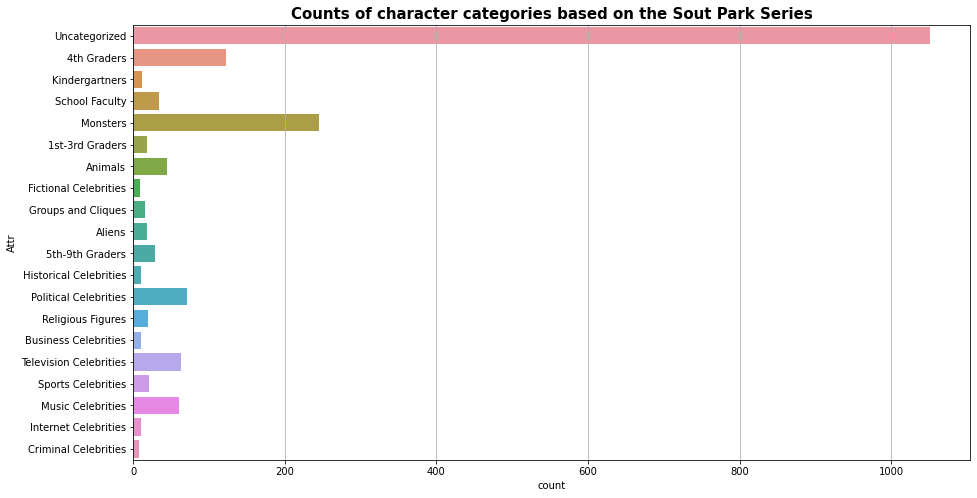

In [ ]:
plt.figure(figsize=(15,8))
plt.grid()
ax = sns.countplot(y=df_final['Attr'], data=df_final)
ax.set_title('Counts of character categories based on the Sout Park Series', size = '15', fontweight='bold')
plt.savefig('./plot_images/DF_series_categories_count.png')
plt.show()

In [ ]:
print('No. of South Park character categories: ',len(df_final.Attr.unique())-1)

No. of South Park character categories:  19


The categories of the South Park characters were taken from the url content of this page: https://southpark.fandom.com/wiki/Portal:Characters/Categorized_Characters.

The bar chart above shows, that while most of the South Park characters remain uncategorized, there is yet a wide range of about 19 categories. It seems that one of the largest categories are the 4th Graders and the Monsters. This is expected, as the main SP characters are 4th graders, and there are a lot of weird monsters and talking animals in the series. Another noticeable category is the Political Celebrities, which the series loves to make fun of. 

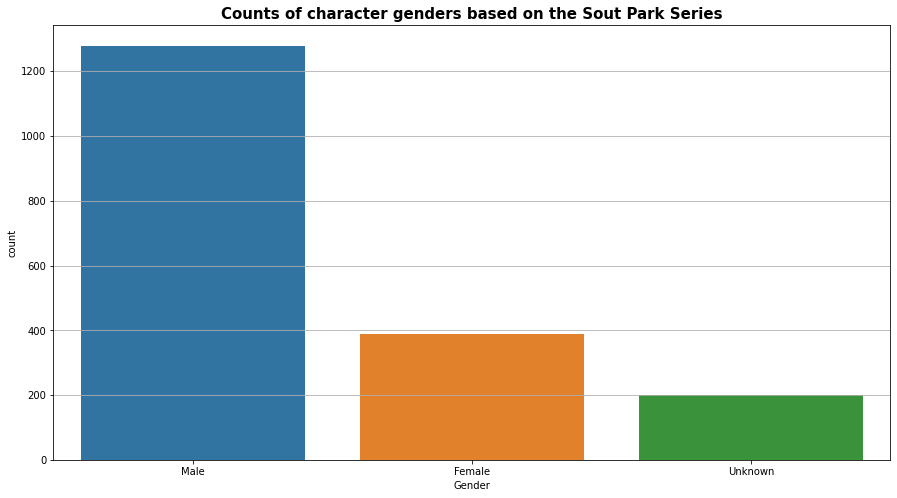

In [ ]:
plt.figure(figsize=(15,8))
plt.grid()
ax = sns.countplot(x=df_final['Gender'], data=df_final)
ax.set_title('Counts of character genders based on the Sout Park Series', size = '15', fontweight='bold')
plt.savefig('./plot_images/DF_gender_count.png')
plt.show()

The bar chart on gender attributes of the dataframe object reveals that most of the SouthPark characters are male. Less than half of the characters are female and a small amount of the characters' gender is unknown . Considering the character categories discussed above, this is somewhat expected as some SP characters are not human (one thing to be mention is that the unknown category also includes non-binary genders). 

In [ ]:
print('No. of South Park character categories: ',len(df_final.Race.unique())-1)

No. of South Park character categories:  135


Since there are 135 (!) races, the bar chart was plotted for the top 10. 

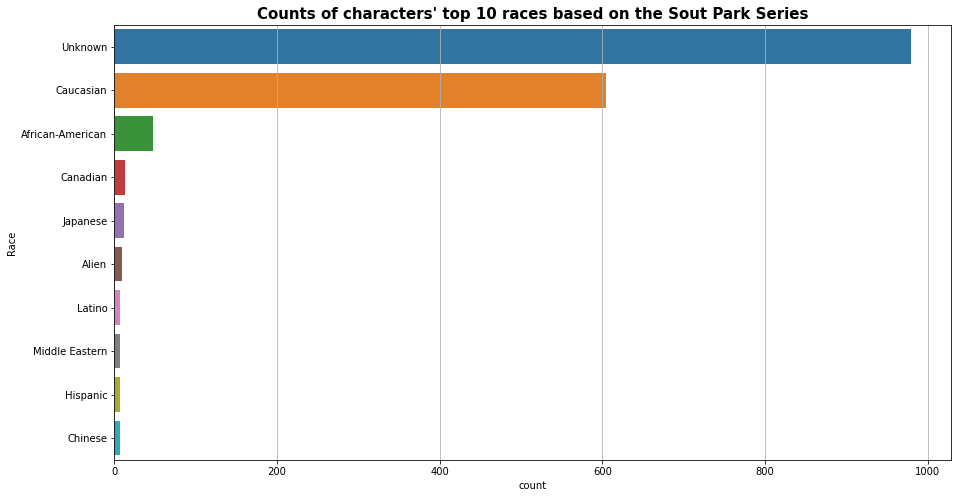

In [ ]:
plt.figure(figsize=(15,8))
plt.grid()
ax = sns.countplot(y=df_final['Race'], data=df_final, order=pd.value_counts(df_final['Race']).iloc[:10].index)
ax.set_title("Counts of characters' top 10 races based on the Sout Park Series", size = '15', fontweight='bold')
plt.savefig('./plot_images/DF_topraces_count.png')
plt.show()

The counts of the top races of the SP characters is displayed in the bar plot above. Unfortunately most of the SP characters did not have assigned a race or it was not properly retrieved from the TXT files. But as far as the TXT files were looked through, the first reason seems more plausible. The most frequent revealed race of the South Park characters is Caucasian. It is expected that most of the SP characters are caucasian, as the series action takes place in the fictional South Park town which is supposedly located in the Colorado state in the US. Following this, it is also explainable why the second most-frequent race in the series is African-American. 

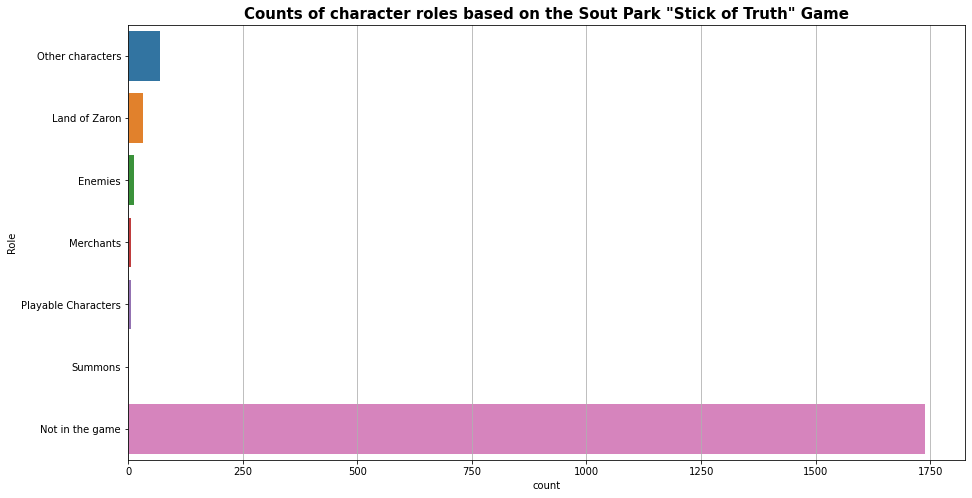

In [ ]:
plt.figure(figsize=(15,8))
plt.grid()
ax = sns.countplot(y=df_final['Role'], data=df_final)
ax.set_title('Counts of character roles based on the Sout Park "Stick of Truth" Game', size = '15', fontweight='bold')
plt.savefig('./plot_images/DF_count_game.png')
plt.show()

In [ ]:
count_not_in_game = df_final.Role.value_counts()['Not in the game']

prop = (len(df_final)-count_not_in_game)/len(df_final)*100
print('Only {:.1f}% of the South Park characters are in the Stick of Truth Game!'.format(prop))

Only 7.0% of the South Park characters are in the Stick of Truth Game!


The barplot above regarding the Stick of Truth Game is entirely different. Since the South Park universe is huge, it is expected that most of the characters are not in the Stick of Truth Game. 

Referring to the characters' categories in the game, the most frequent one is 'Other characters', followed by the 'Land of Zaron' and 'Enemies'. Playing the game, one can confirm that yes, a lot of the game characters belong to the 'Land of Zaron', which is the ally land assigned to find the stick of truth. However, most of the other characters make only a small appearance in the game, so it makes sense why they are not categorized. 

In the game, one can battle with most characters, however they are not considered the main enemies of the story. This explains why the 'Enemies' category is not as large as the 'Other characters' category. 

**Note**:

Since most of the South Park series characters are uncategorized, it would be interesting to plot a graph and color the nodes based on the gender in the game

Let's save the DataFrame object to a csv file

In [ ]:
df_final.to_csv('df_final_SouthPark_characters.csv')

### Helper functions - get the list of characters based on the API of each SP character
Based on the wiki-page of each South Park character, the list of characters each SP character is connected to can be found by accessing 2 types of links.
- Main description: https://southpark.fandom.com/wiki/NAME_CHARACTER 

In [ ]:
# based on the API for interractions
def get_characters_interactionslink(name):
    """
    get_characters_interactionslink gets the list of characters connected to the character name using the main page 'Interactions' link section

    Input:
    :name: (str) API readable name of the given Sout Park character

    Return:
    :list_of_connected_characters: (str list) list of characters to which the character name is connected with - based on the API 
    """ 
    import urllib.request
    import json
    import re
    import pandas as pd

    baseURL = "https://southpark.fandom.com/api.php?"
    titles = "titles=" + name + "/Interactions"
    action = action = "action=query"
    dataformat = "format=json"
    content = "prop=revisions&rvprop=content&rvslots=*"

    query = "{}{}&{}&{}&{}".format(baseURL, action, content, titles, dataformat)

    response = urllib.request.urlopen(query)
    data = response.read()
    text = data.decode("utf-8")

    tojson = json.loads(text)

    # extract characters
    pattern = r"\=\=\[\[([^:]*?)\]\]\=\="
    tojson = re.findall(pattern, str(tojson))

    list_of_connected_characters = []

    for i in tojson:
        if '|' in i: 
            i = i.split("|")[1]
        i = i.replace(' ','_')
        list_of_connected_characters.append(i)

    return list_of_connected_characters

- Interactions: https://southpark.fandom.com/wiki/NAME_CHARACTER/Interactions 

In [ ]:
def get_characters_mainpage(name):
    """
    get_characters_interactionslink gets the list of characters connected to the character name using the main page description

    Input:
    :name: (str) API readable name of the given Sout Park character

    Return:
    :list_of_connected_characters: (str list) list of characters to which the character name is connected with - based on the API 
    """ 
    import urllib.request
    import json
    import re
    import pandas as pd

    baseURL = "https://southpark.fandom.com/api.php?"
    titles = "titles=" + name 
    action = action = "action=query"
    dataformat = "format=json"
    content = "prop=revisions&rvprop=content&rvslots=*"

    query = "{}{}&{}&{}&{}".format(baseURL, action, content, titles, dataformat)

    response = urllib.request.urlopen(query)
    data = response.read()
    text = data.decode("utf-8")

    tojson = json.loads(text)

    # extract characters - pattern 1
    pattern = r"\=\=\=\[*\[*([^:]*?)\]*\]*\=\="
    tojson1 = re.findall(pattern, str(tojson))

    # extract characters - pattern 2
    pattern2 = r"\[\[([^:]*?)\]\]"
    tojson2 = re.findall(pattern2, str(tojson))

    tojson1.extend(tojson2)

    list_of_connected_characters = []
    for i in tojson1:
        if '|' in i: 
            i = i.split("|")[1]
        i = i.replace(' ','_')
        list_of_connected_characters.append(i)

    
    return list_of_connected_characters

### Main function - get the list of characters based on the API of each SP character

In [ ]:
# get characters 
# filter based on the characters in the game
def get_characters_list(name, namelist):
    """
    get_characters_list gets the list of characters from both the Main page and the Characters subsection using the API

    Input:
    :name: (str) API readable name of the given Sout Park character
    :namelist: (str list) already known list of characters based on which the the name filtering will be done

    Return:
    :connected_characters_main: (str list) filtered list of characters to which the character name is connected with
    """ 
    connected_characters = []
    list_of_connected_characters1 = get_characters_interactionslink(name)
    list_of_connected_characters2 = get_characters_mainpage(name)
    connected_characters.extend(list_of_connected_characters1)
    connected_characters.extend(list_of_connected_characters2)
    connect_char = set(connected_characters)
    namelistset = set(namelist)
    #retrun the intersection between namelist and the list of connected characters found on the wikipage
    connected_characters_main = connect_char.intersection(namelistset)

    return list(connected_characters_main)

# Create and export Graph 1: South Park Series

In [ ]:
def create_node_plus_properties(name, df):
    """
    create_node_plus_properties creates a truple which will be added to a node in a graph

    Input:
    :name: (str) API readable name of the given Sout Park character
    :df: (DataFrame) DataFrame containing all the characers names from South Park plus their attributes

    Return:
    :(real_name,role,real_linked_characters_list): (str, str, str list) truple of attributes
    """ 
    
    row = df.loc[df['Name'] == name]
    role = row.iloc[0,1]
    real_name = row.iloc[0,2]
    series_role = row.iloc[0,3]
    gender =row.iloc[0,4]
    race = row.iloc[0,5]
    episode_name = row.iloc[0,6]
    list_characters_s = list(df.Name)

    if name == 'Jerome_%22Chef%22_McElroy#Darth_Chef':
        name == 'Jerome_%22Chef%22_McElroy'

    linked_characters_list = get_characters_list(name,list_characters_s)
    return name,real_name,role,series_role,gender,race,episode_name,linked_characters_list

Not: As creating the graph only needs to be done once and then it can be saved, this code section is commented out.

In [ ]:
# create the graph - takes a long time, so this block is commented out
'''
import networkx as nx
import re

#create graph:
G = nx.DiGraph()

char_test_list = list(df_final['Name'])

#add nodes
i = 0
for name in list(df_final['Name']):

    print(i)
    print(name)
    i +=1

    node_name,node_real_name,node_role_game,node_role_series,node_gender,node_race,node_episode, node_linked_characters_list = create_node_plus_properties(name,df_final)

    G.add_node(node_name, real_name = node_real_name,  
                role_game = node_role_game, role_series = node_role_series,  
                gender = node_gender, race = node_race, episode_name = node_episode,
                node_list = node_linked_characters_list)

    
    #G.add_node(node_name, role_series = node_real_name, role = node_role_game, 
    #            role_series = node_role_series, gender = node_gender, node_list = node_linked_characters_list)
    
#add links
for n1 in list(G.nodes()):
    #get theh characters each node is linking to
    neighbours_list = G.nodes[n1]['node_list']

    if neighbours_list:
        for n2 in neighbours_list:
            #add an edge
            G.add_edge(n1,n2)
'''

"\nimport networkx as nx\nimport re\n\n#create graph:\nG = nx.DiGraph()\n\nchar_test_list = list(df_final['Name'])\n\n#add nodes\ni = 0\nfor name in list(df_final['Name']):\n\n    print(i)\n    print(name)\n    i +=1\n\n    node_name,node_real_name,node_role_game,node_role_series,node_gender,node_race,node_episode, node_linked_characters_list = create_node_plus_properties(name,df_final)\n\n    G.add_node(node_name, real_name = node_real_name,  \n                role_game = node_role_game, role_series = node_role_series,  \n                gender = node_gender, race = node_race, episode_name = node_episode,\n                node_list = node_linked_characters_list)\n\n    \n    #G.add_node(node_name, role_series = node_real_name, role = node_role_game, \n    #            role_series = node_role_series, gender = node_gender, node_list = node_linked_characters_list)\n    \n#add links\nfor n1 in list(G.nodes()):\n    #get theh characters each node is linking to\n    neighbours_list = G.node

## Save the graph for visualization in part B

In [ ]:
# save graph
'''
for name in list(G.nodes()):
    del G.nodes[name]['node_list']
nx.write_gexf(G, "graph.gexf")
'''

'\nfor name in list(G.nodes()):\n    del G.nodes[name][\'node_list\']\nnx.write_gexf(G, "graph.gexf")\n'

# Create and export Graph 2: South Park 'Stick of Truth' Game

In [ ]:
# re-defining the dataframe object keeping only the characters from the game
replacement_mapping_dict = {
    "Red": "Red_McArthur",
    "Kelly": 'Kelly_("Rainforest_Schmainforest")',
    'Emily': 'Emily_Marx',
    "Mrs._Biggle": "Harriet_Biggle",
    "Jenny_(kindergartener)": "Jenny_(Kindergartner)",
    r"Dougie_O\\'Connell": "Dougie_O%27Connell",
    "Jenny_(kindergartener)": "Jenny_(Kindergartner)",
}

for i in range(len(character_list_for_query_game)):
    name = character_list_for_query_game[i]
    if name in replacement_mapping_dict.keys():
        character_list_for_query_game[i] = replacement_mapping_dict[name]

#updating the dataframe object
df_game = df_final[df_final['Name'].isin(character_list_for_query_game)]

#### Re-create the graph only based on the characters from the 'Stick of Truth' Game

In [ ]:
def create_node_plus_properties_game(name, df):
    """
    create_node_plus_properties creates a truple which will be added to a node in a graph

    Input:
    :name: (str) API readable name of the given Sout Park character
    :df: (DataFrame) DataFrame containing all the characers names from South Park plus their attributes

    Return:
    :(real_name,role,real_linked_characters_list): (str, str, str list) truple of attributes
    """ 
    
    row = df.loc[df['Name'] == name]
    role = row.iloc[0,1]
    real_name = row.iloc[0,2]
    gender = row.iloc[0,4]
    race = row.iloc[0,5]
    list_characters_s = list(df.Name)

    if name == 'Jerome_%22Chef%22_McElroy#Darth_Chef':
        name == 'Jerome_%22Chef%22_McElroy'

    linked_characters_list = get_characters_list(name,list_characters_s)
    return name, role, real_name, gender, race, linked_characters_list

In [ ]:
# create the Game graph
import networkx as nx
import re

#create graph:
G = nx.DiGraph()

char_test_list = list(df_game['Name'])
#add nodes
#i = 0
for name in list(df_game['Name']):
    name, role, real_name, gender, race, linked_characters_list = create_node_plus_properties_game(name,df_game)
    G.add_node(name, real_name = real_name, role = role, 
                gender = gender, race = race,
                node_list = linked_characters_list)
    #print(i)
    #print(name)
    #i +=1
    
#add links
for n1 in list(G.nodes()):
    #get theh characters each node is linking to
    neighbours_list = G.nodes[n1]['node_list']

    if neighbours_list:
        for n2 in neighbours_list:
            #add an edge
            G.add_edge(n1,n2)

In [ ]:
# extract the connected component
GN_game = G.subgraph(nx.shortest_path(G.to_undirected(),'Eric_Cartman')).to_undirected()

In [ ]:

for name in list(GN_game.nodes()):
    del GN_game.nodes[name]['node_list']

# save graph
nx.write_gexf(GN_game, "graph_game.gexf")

# Compile clear tokens out of the SP characters' TXT files:

In [ ]:
# we import the nltk package in order to download the stopwords, punctuation and etc. which need to be filtered out from the txt files: 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_final["Name"] = df_final["Name"].replace({'Charlie/Marcus_Andrews_and_his_Superior_Officer':'CharlieMarcus_Andrews_and_his_Superior_Officer'})

In [ ]:
def give_clean_tokens(name, namelist, file_path):

    """
    give_clean_tokens gives the clear word tokens used for one SP character - using its correspondent txt file 

    Input:
    :name: (str) name of the given SP character
    :namelist: (list) list containing all the characers names from SP 
    :file_path: (str) a folder containing the clean txt files from the SP wiki pages which I have processed in Week 6

    Return:
    :clear_token_list: (list) a list with all the clean token words processed from the txt file
    """ 
    import re
    import urllib
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer 
    from urllib.parse import quote
    
    #Charlie is a special case
    #for i in name:
    #    if i== 'Charlie/Marcus_Andrews_and_his_Superior_Officer':
    #        i= 'CharlieMarcus_Andrews_and_his_Superior_Officer'
    #if name == 'Jerome_%22Chef%22_McElroy#Darth_Chef':
    #    name = 'Jerome_%22Chef%22_McElroy'

    #title = urllib.parse.quote_plus(str(name))
    #title2 = title.replace(' ','_')
    filename = file_path + name + '.txt'
    f = open(filename, "rt" )
    text= f.read()

    #pattern for sections
    # pattern 1 starting from description
    pat1 = r"\'''(.*)"
    # everything between square brackets
    pat2 = r'(\[\[(.*?)\]\])'
    # everything between cyrly brackets
    pat3 = r'\{\{(.*?)\}\}'
    #remove images info if existent
    pat4 = r'"Images.*<'
    # remove everything after Absences
    pat5 = r'==Absences.*'
    pat6 = r'==References.*'
    pat7 = r'==Gallery.*'
    pat8 = r'==Video Games.*'
    #pat9 = r'==Prominence.*'
    # everything that is in between <>
    pat10 = r'\<(.*?)\>' 
    # remove all headers
    pat11 = r'(\\n:?)([\=]+[^:]*?[\=]+)(\\:?)'
    # remove all \n
    pat12 = r'\\n'
    # remove punctuations
    pat13 = r'[^\w\s]'
    # remove more than one empty space
    pat14 = r' +'

    text = re.findall(pat1, str(text))
    text = re.sub(pat2, '', str(text))
    text = re.sub(pat3, '', str(text))
    text = re.sub(pat4, '', str(text))
    text = re.sub(pat5, '', str(text))
    text = re.sub(pat6, '', str(text))
    text = re.sub(pat7, '', str(text))
    text = re.sub(pat8, '', str(text))
    #text = re.sub(pat9, '', str(text))
    text = re.sub(pat10, '', str(text))
    text = re.sub(pat11, '', str(text))
    text = re.sub(pat12, '', str(text))
    text = re.sub(pat13, ' ', str(text))
    text = re.sub(pat14, ' ', str(text))
    
    
    #remove stop words
    text_tokens = word_tokenize(text)

    data_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    #lowercase each letter
    data_lowercase = list(map(str.lower, data_without_sw)) 

    #lemmatize each word
    lemmatizer = WordNetLemmatizer()
    data_lemmatized = [lemmatizer.lemmatize(word) for word in data_lowercase]

    #remove character names

    #df_final['Real_Name']
    #['stan marsh', 'eric cartman'] -> ['stan', 'marsh', 'eric', 'cartman']


    data_without_characters = data_lemmatized.copy()
    
    for character in namelist:
        data_without_characters_names = [x for x in data_without_characters if x!=character.lower()]
       # data_without_characters = list(filter(lambda val: val !=  character.lower(), data_without_characters))

    # save the clean tokens as txt files - will not do for this case

    path = '/work/Characters_clean_tokens/'
    with open(path + name + '.txt', 'w') as f:
        for item in data_without_characters_names:
            f.write("%s\n" % item)

    clear_token_list = data_without_characters_names.copy()

    return clear_token_list

In [ ]:
# ist of names to exclude from the clear tokens
namelist = df_final.Real_Name.str.split(" ").explode().values

Note: This section is commented out as we only need to run this once to compile the clear tokens for each TXT file:

In [ ]:
file_path = '/work/Characters_txt_files/'
for name in tqdm(df_final.itertuples()):
    give_clean_tokens(name.Name, namelist, file_path)

1870it [05:47,  5.38it/s]


## That's all for the data mining of the South Park wiki fandoms! For graphs and text analysis check Part B!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20df22e1-bd6b-4c24-9922-b8282aa7b6df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>